In [118]:
import tensorflow as tf
import sys
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import importlib

import primary_model as pm
import fasta_to_1_hot_encodings as fthe
import get_contact_maps as gcm


path = "../../"
model_path = path + "models/"
test_path = path + "data/test/"
model_path_cull = model_path + "cull%i/" % 1

fasta_seq_path = test_path + "casp11.fasta"
pdb_path = test_path + "casp11.targets_refine/"

sys.path.insert(0, model_path + "model_functions")
sys.path.insert(0, path + "preprocess")


%matplotlib inline
importlib.reload(gcm)
importlib.reload(fthe)

<module 'fasta_to_1_hot_encodings' from '../../preprocess/fasta_to_1_hot_encodings.py'>

In [89]:
model = tf.keras.models.load_model(
    model_path_cull + 'my_model.h5',
    custom_objects={"OuterProduct": pm.OuterProduct}
)

In [120]:
fasta_seqs = fthe.convert_fasta_to_1_hot(fasta_seq_path, train=False)

In [100]:
c_maps = gcm.get_contact_maps(pdb_path, train=False)

PDB File:  TR217.pdb
PDB File:  TR228.pdb
PDB File:  TR274.pdb
PDB File:  TR280.pdb
PDB File:  TR283.pdb
PDB File:  TR759.pdb
PDB File:  TR760.pdb
PDB File:  TR762.pdb
PDB File:  TR765.pdb
PDB File:  TR768.pdb
PDB File:  TR769.pdb
PDB File:  TR772.pdb
PDB File:  TR774.pdb
PDB File:  TR776.pdb
PDB File:  TR780.pdb
PDB File:  TR782.pdb
PDB File:  TR783.pdb
PDB File:  TR786.pdb
PDB File:  TR792.pdb
PDB File:  TR795.pdb
PDB File:  TR803.pdb
PDB File:  TR810.pdb
PDB File:  TR811.pdb
PDB File:  TR816.pdb
PDB File:  TR817.pdb
PDB File:  TR821.pdb
PDB File:  TR822.pdb
PDB File:  TR823.pdb
PDB File:  TR827.pdb
PDB File:  TR828.pdb
PDB File:  TR829.pdb
PDB File:  TR833.pdb
PDB File:  TR837.pdb
PDB File:  TR848.pdb
PDB File:  TR854.pdb
PDB File:  TR856.pdb
PDB File:  TR857.pdb


In [110]:
c_maps

{'TR217': array([[ True,  True,  True, ..., False,  True,  True],
        [ True,  True,  True, ..., False,  True,  True],
        [ True,  True,  True, ..., False,  True,  True],
        ...,
        [False, False, False, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]]),
 'TR228': array([[ True,  True,  True, ..., False, False, False],
        [ True,  True,  True, ..., False, False, False],
        [ True,  True,  True, ..., False, False, False],
        ...,
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True]]),
 'TR274': array([[ True,  True,  True, ..., False,  True,  True],
        [ True,  True,  True, ..., False, False, False],
        [ True,  True,  True, ..., False, False, False],
        ...,
        [False, False, False, ...,  True,  True,  True],
        [ True, Fa

In [121]:
fasta_seqs

{'T0759': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'T0760': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'T0761': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 1.]]),
 'T0762': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 1., 0., 0.],
        [

In [122]:
test_id = 'TR857'
test = fasta_seqs[test_id]
test2 = test.reshape((1,) + test.shape )
test2.shape

(1, 105, 20)

In [129]:
prediction = model.predict(test2)#.shape
prediction.shape

len("GHMGSPVSYYFSYADGGTSHTEYPDDSSAGSFILDITSYKKTGNSTKALSWNASGDSWIHVNGSSVSYDENPAKERRTGLVTLKQDESGKTLSLKIVQPGKTSID")

105

In [153]:
reshaped = prediction.reshape(prediction.shape[1:])
reshaped.shape
type(model)

tensorflow.python.keras.engine.training.Model

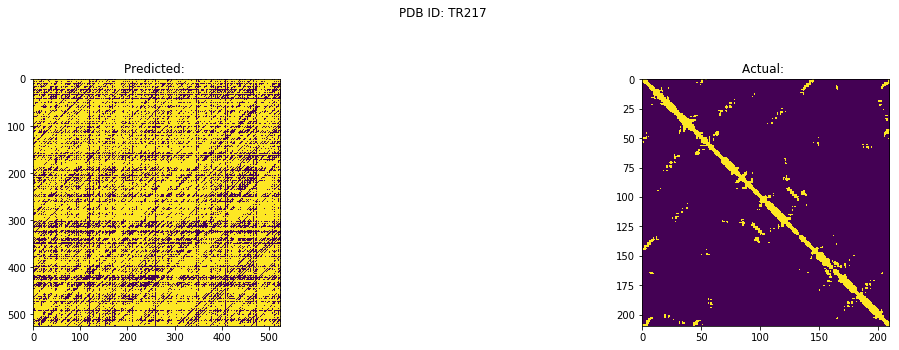

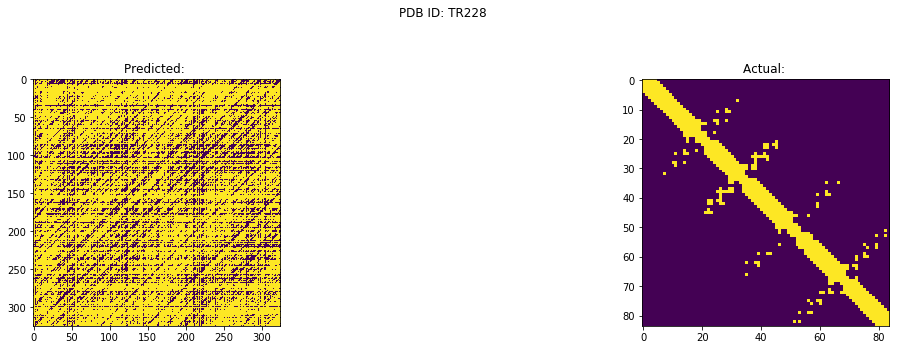

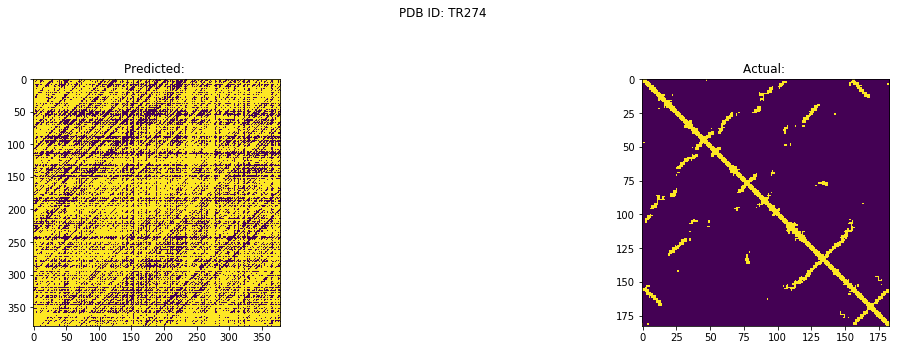

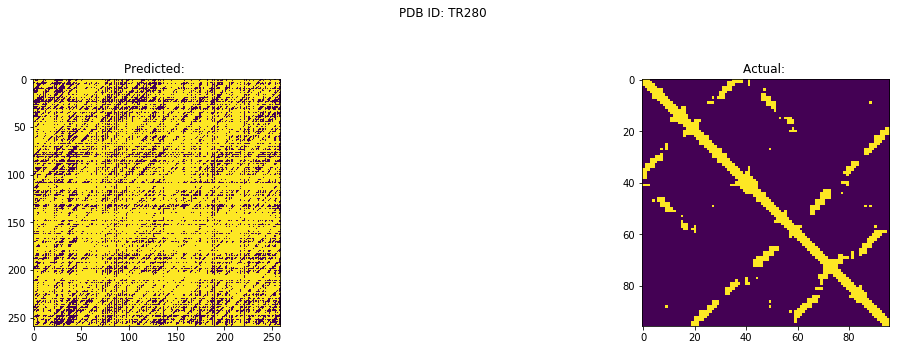

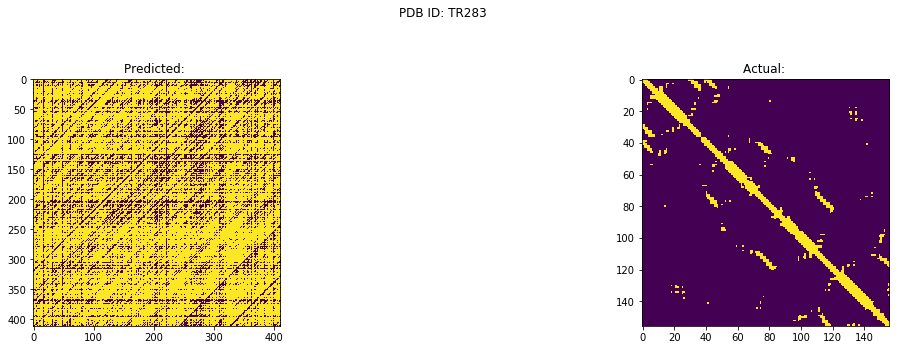

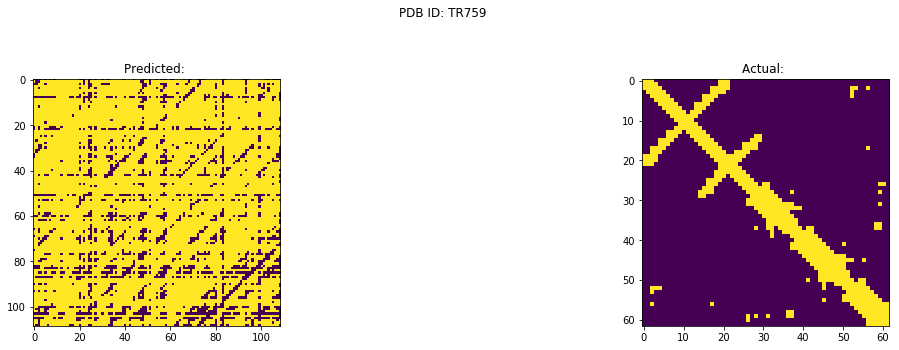

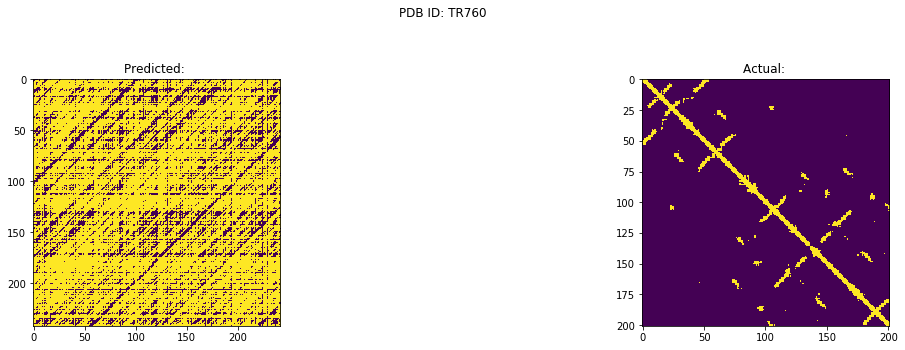

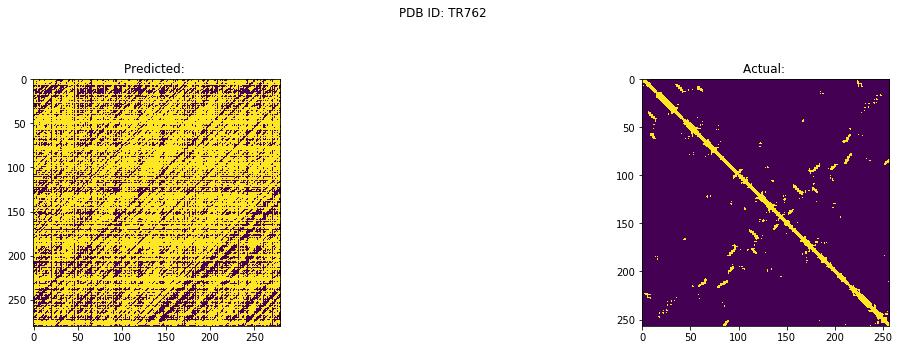

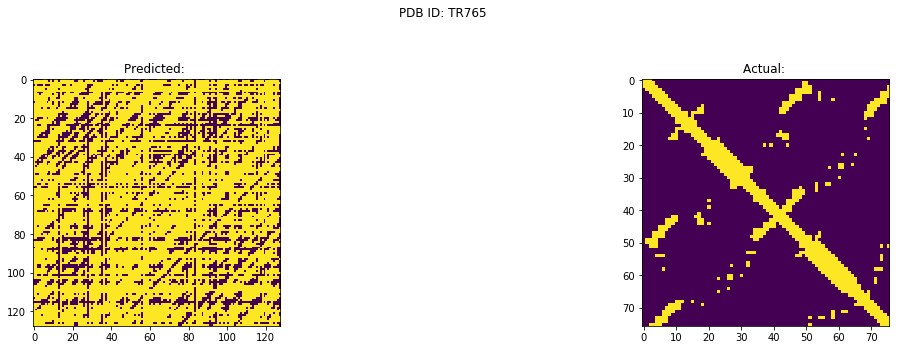

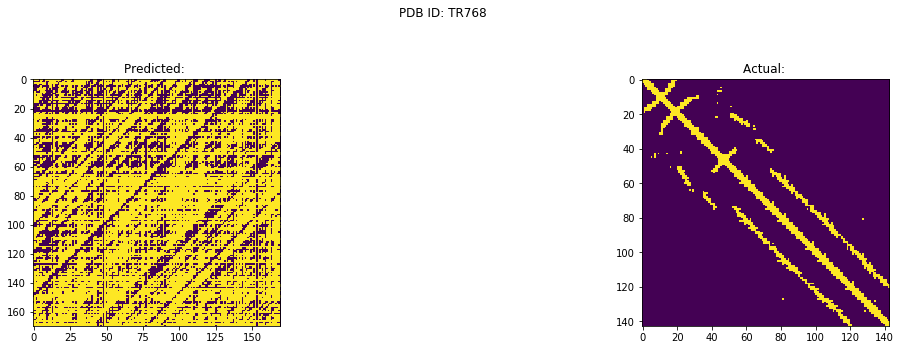

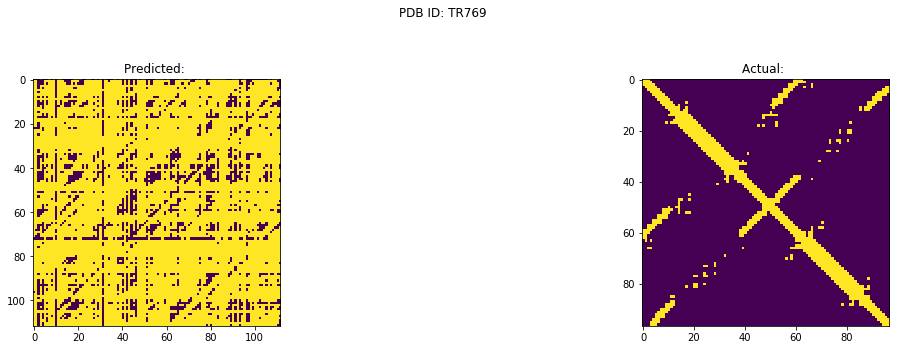

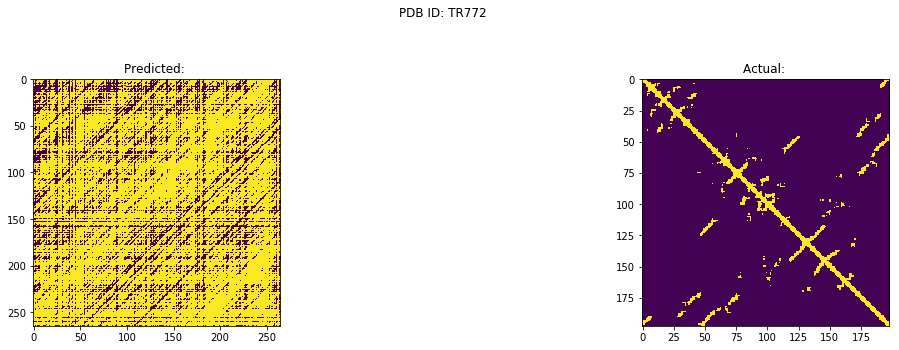

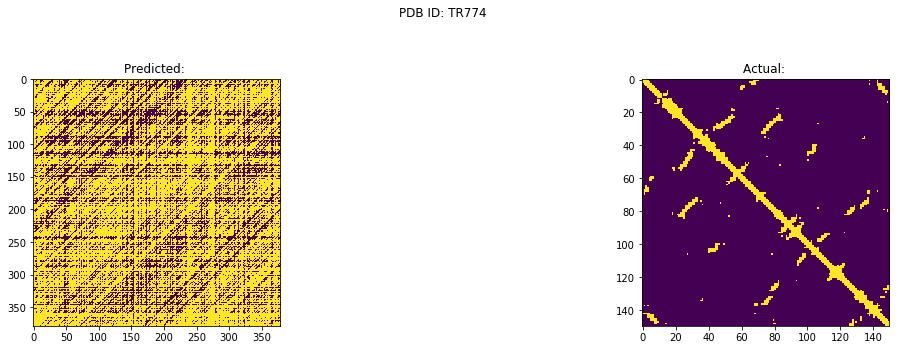

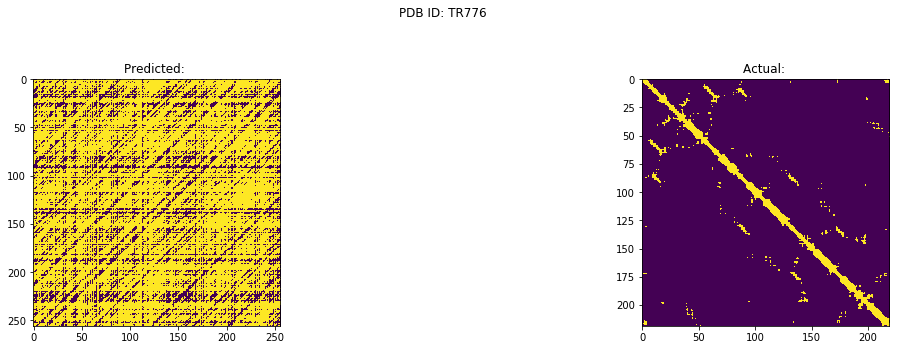

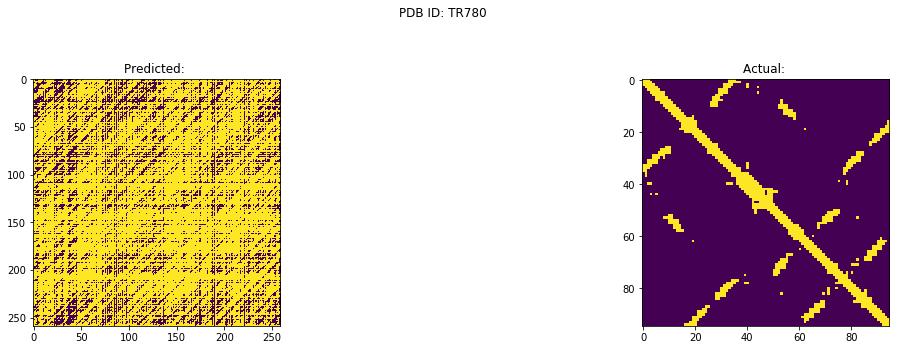

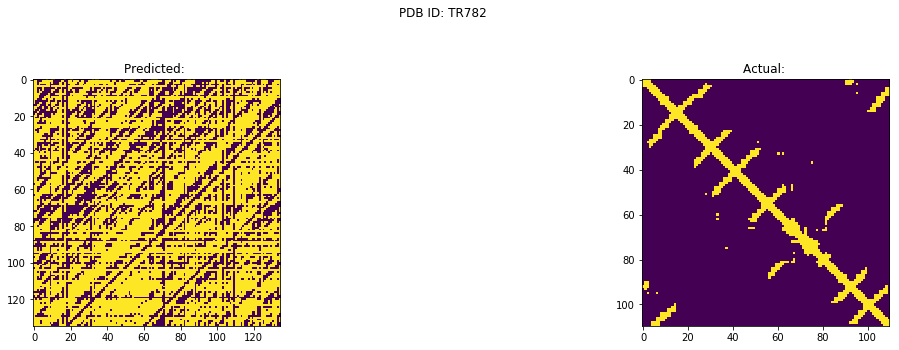

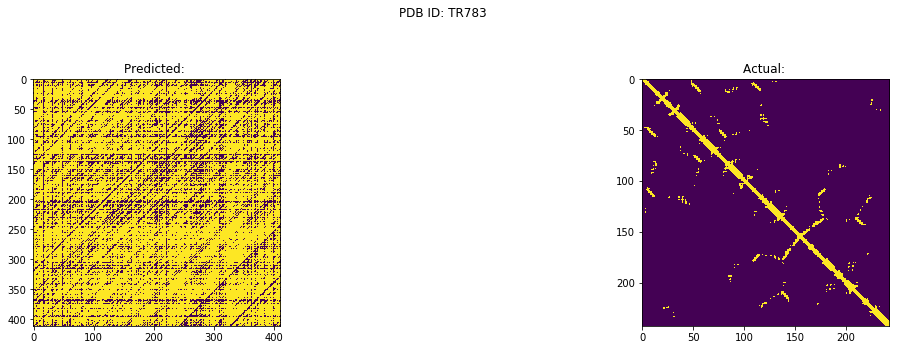

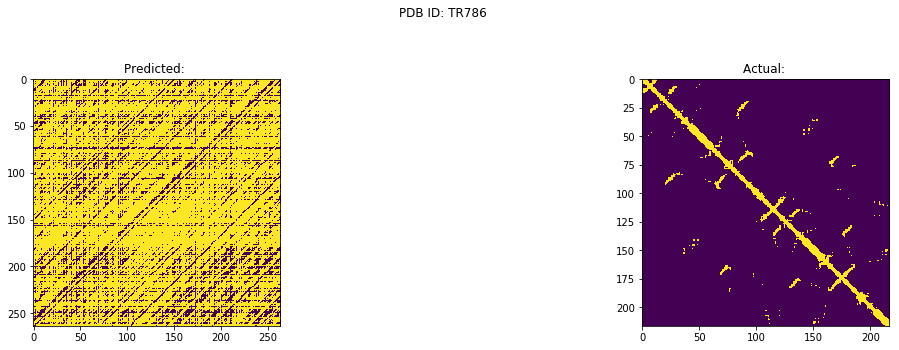

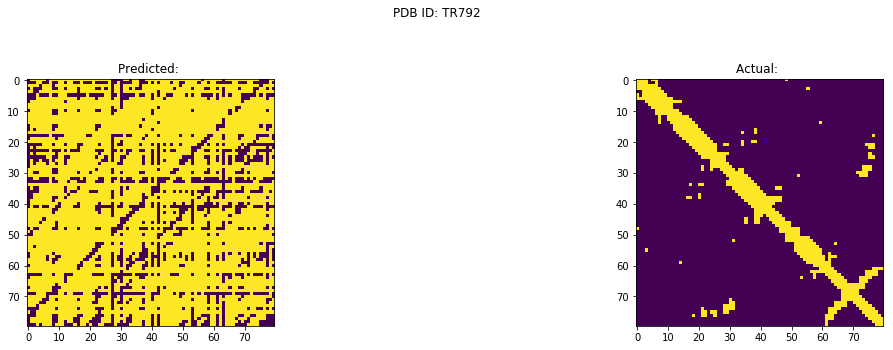

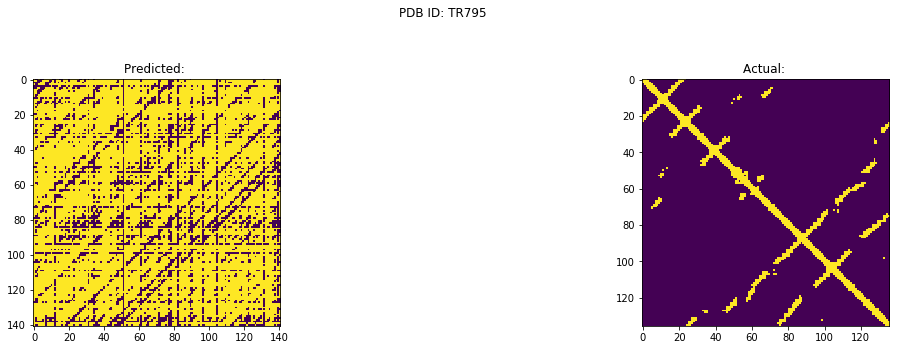

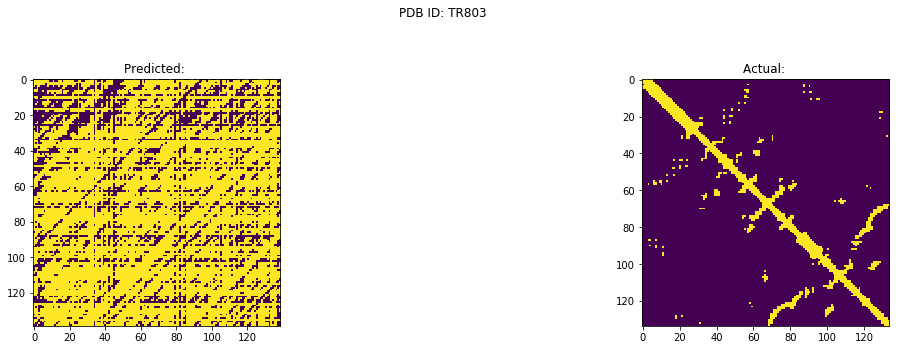

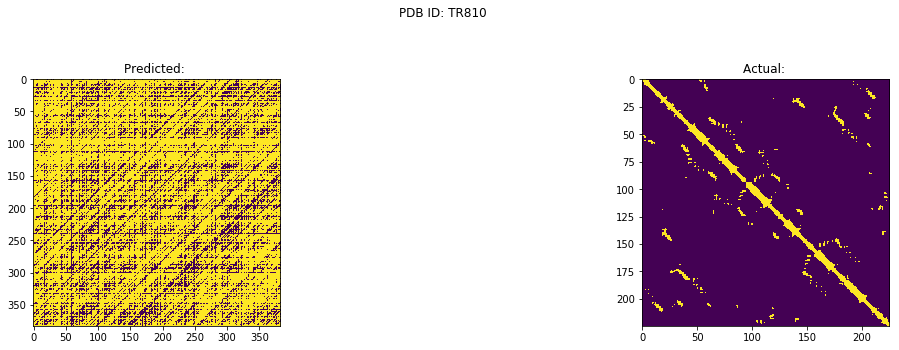

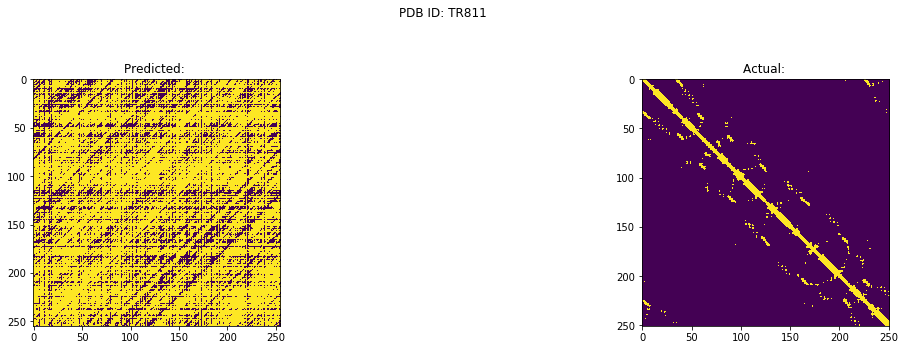

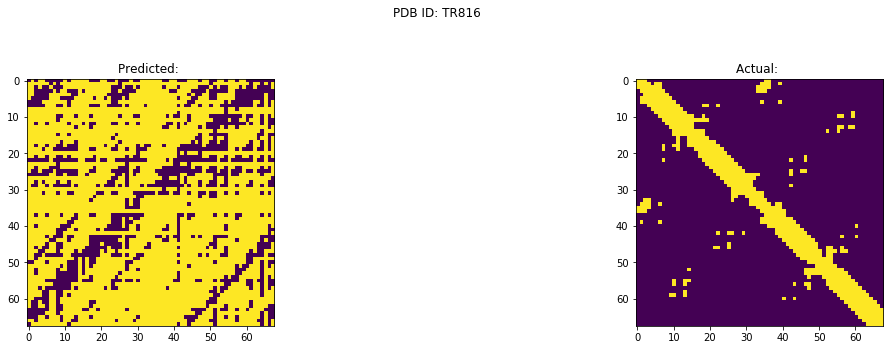

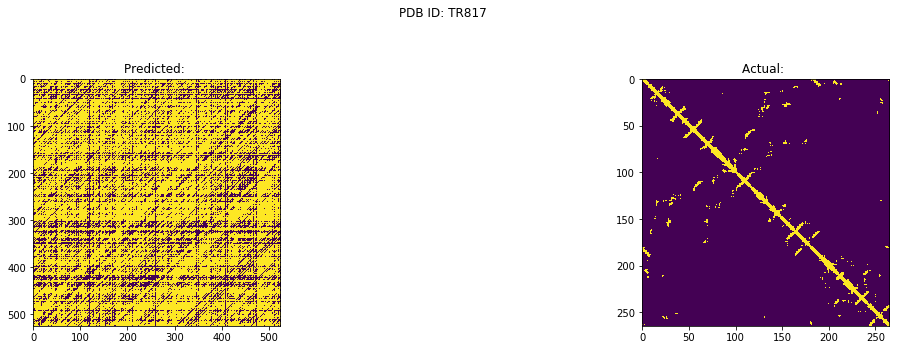

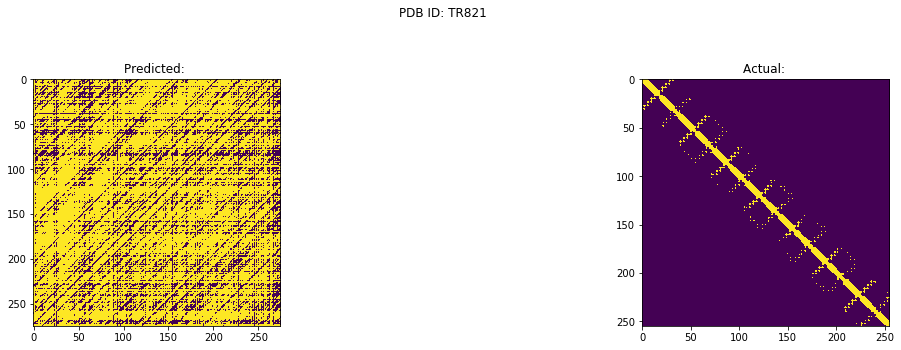

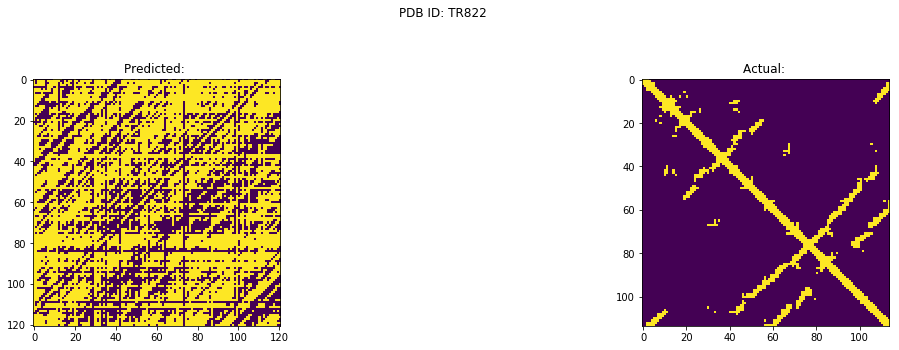

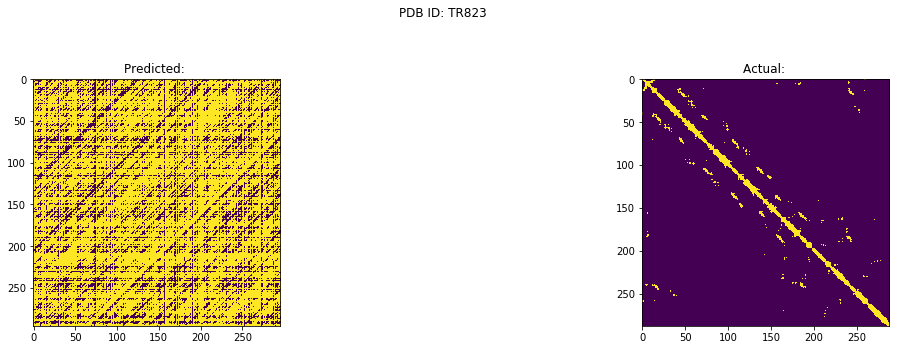

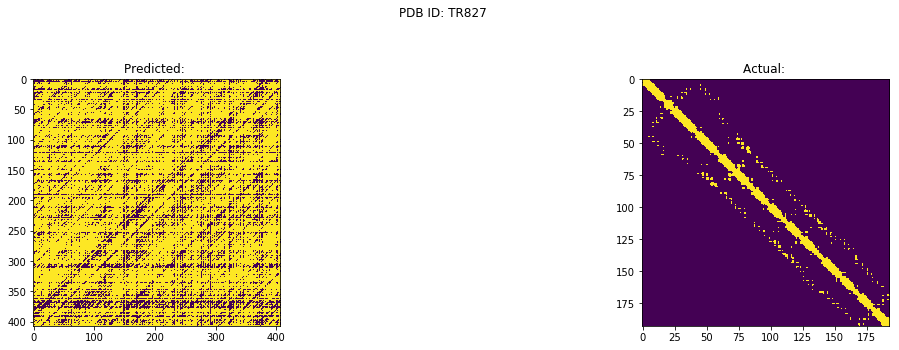

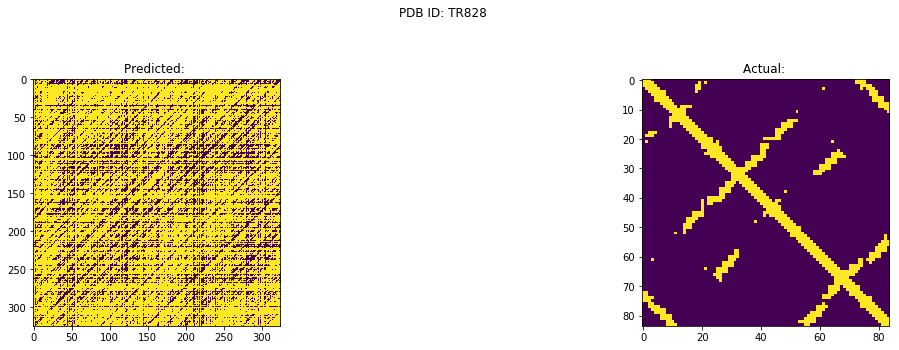

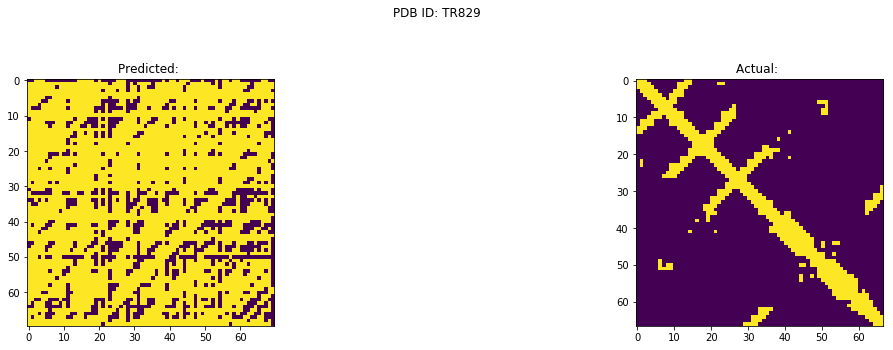

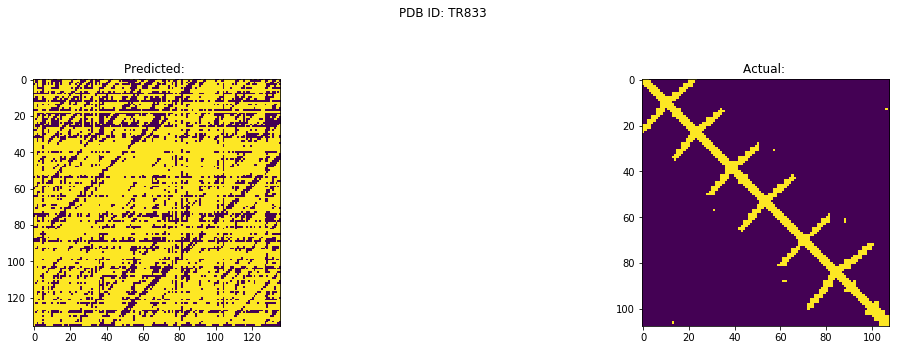

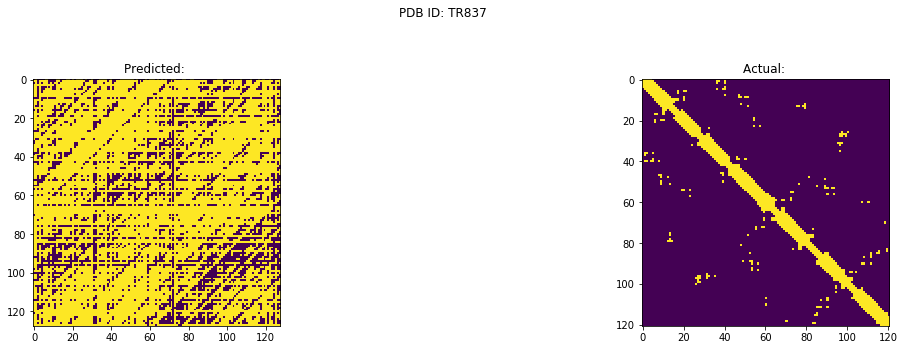

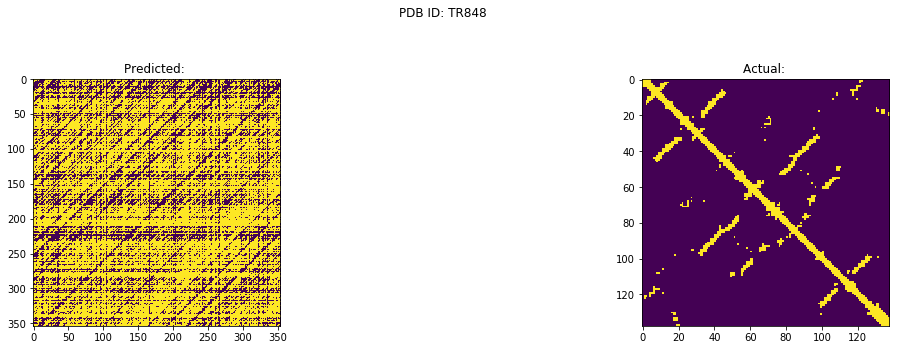

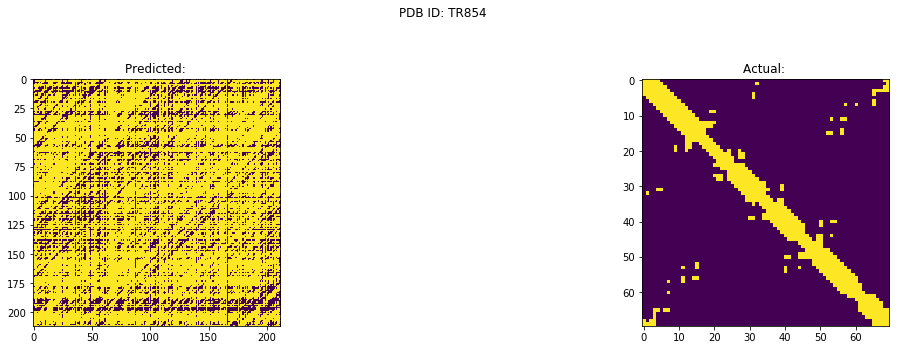

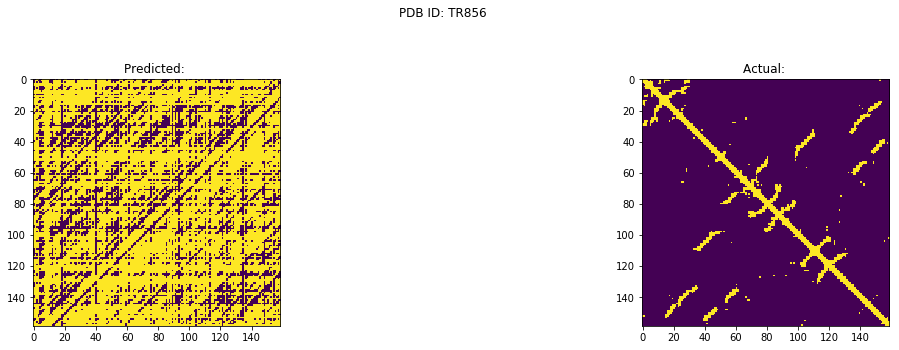

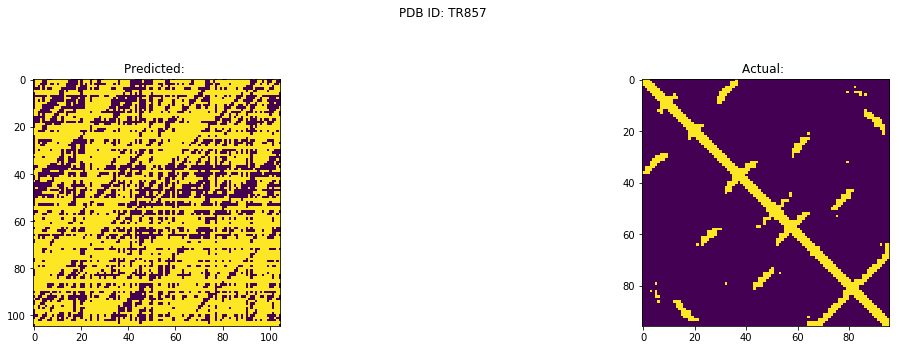

In [156]:
# .shape


def plot_contact_maps(model, fasta_seqs, c_maps, save_dir="plots/"):
    """
    If possible, plot the actual contact maps
    and the predicted contact maps.

    :param model: trained keras model
    :type  model:
    :param fasta_seq: dictionary mapping PDB ID to 1 hot 
    :type  fasta_seq: dict
    :param c_maps: dictionary mapping PDB ID to c_map
    :type  c_maps: dict
    :param save_dir: directory to save plots
    :type  save_dir: str
    """

    for pdb_id, cmap in c_maps.items():
        one_hot = fasta_seqs[pdb_id]
        one_hot = one_hot.reshape((1,) + one_hot.shape)
        c_map_pred = model.predict(one_hot)

        c_map_pred = c_map_pred.reshape(c_map_pred.shape[1:])
        fig = plt.figure(figsize=(20, 10))
        fig.suptitle("PDB ID: " + pdb_id)

        ax1 = plt.subplot(221)
        ax1.set_title("Predicted: ")
        plt.imshow(c_map_pred[:, :, 0] > 0.5)

        ax2 = plt.subplot(222)
        ax2.set_title("Actual: ")
        plt.imshow(c_maps[pdb_id])

        plt.savefig(save_dir + pdb_id + "cmap.png")


plot_contact_maps(model, fasta_seqs, c_maps)

In [144]:
one_hot = fasta_seqs["TR774"]
one_hot = one_hot.reshape((1,) + one_hot.shape)
c_map_pred = model.predict(one_hot)

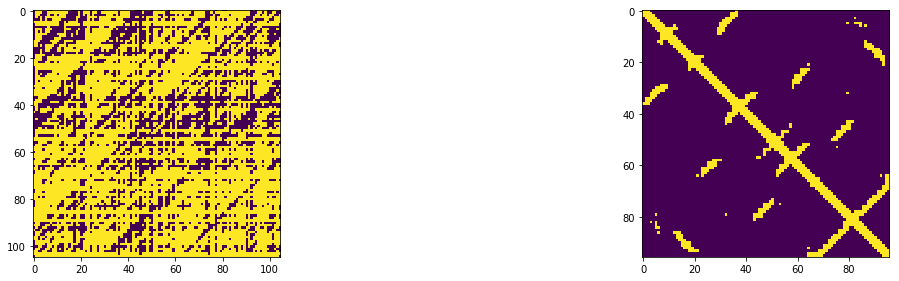

In [155]:
# plt.subplots(2,2)
plt.figure(figsize=(20,10))
# plt.figure
plt.subplot(221)
plt.imshow(reshaped[:,:,0] > 0.5)
plt.subplot(222)
plt.imshow(c_maps[test_id])
save_dir = "plots/"
plt.savefig(save_dir + "test_plot.png")
# reshaped[:,:,0]#.shape

In [51]:
# from Bio import SeqIO
# for i in SeqIO.parse(fasta_seq_path, "fasta"):
#     print (i.name)
#     break

In [52]:
# type(SeqIO.parse(fasta_seq_path, "fasta"))

In [ ]:
# def sequences_to_dict(seq_gen):
#     """
#     Create a dictionary mapping the PDB ID to
#     the sequence.
#     This is an alternative to SeqIO.to_dict, which
#     can not handle duplicate keys.
#     This will only get the first key if there
#     are duplicate keys

#     :param: a generator for the fasta sequences
#     :type:  generator
#     :returns: dictionary mapping key to sequence
#     :rtype:   dict
#     """

#     dict1 = {}

#     for seq in seq_gen:
#         try:
#             dict1[seq.name] = seq
#         except ValueError:
#             pass

#     return dict1

In [45]:
?SeqIO.to_dict

In [117]:
"TR283,"[:5]

'TR283'